# 15장: 힙 (Heap)

- 최소 힙 (Min Heap): 부모가 항상 자식보다 작거나 같음
- 거의 완전한 트리 (Almost Complete Tree): https://code-lab1.tistory.com/8
  - 마지막 레벨을 제외 하고 모든 레벨이 완전히 채워져 있음
  - 마지막 레벨은 꽉 차 있지 않아도 되지만, 노드가 왼쪽에서 오른쪽으로 채워져야함
  - 완전 이진 트리는 배열을 사용해 효율적으로 표현 가능함
- 파이썬은 최소힙으로만 구현되어있음

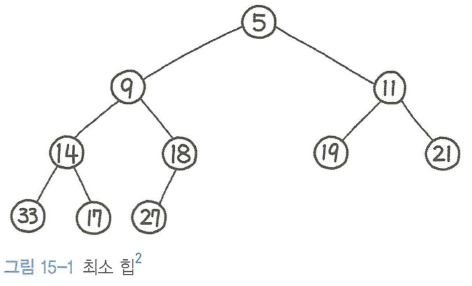

- 우선순위 큐 ADT는 주로 힙으로 구현하고, 힙은 주로 배열로 구현함
- 따라서 우선순위 큐는 결국 배열로 구현하는 셈

- 주의) 힙은 정렬된 구조가 아니라는점
- 부모, 자식간의 관계만 정의할 뿐, 좌우에 대한 관계는 정의하지 않음

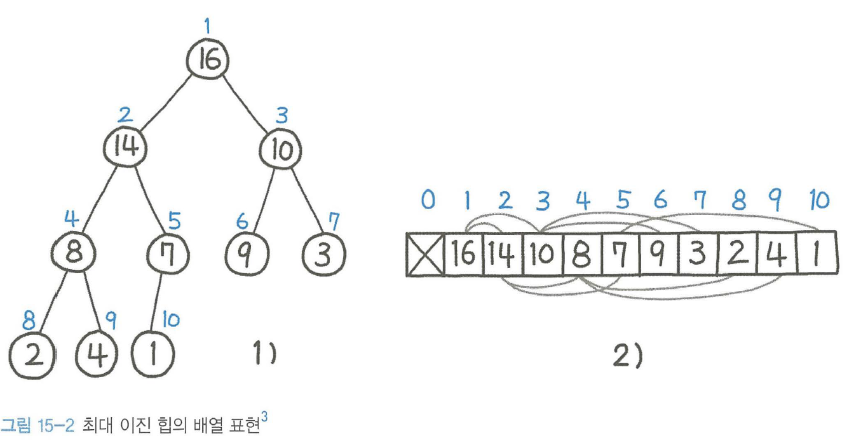

- 이진 힙은 배열에 빈틈없이 배치가 가능함
- 트리의 배열 표현의 경우 계산을 편하게 하기 위해 인덱스는 1부터 사용함

- 우선순위 큐, 다익스트라 알고리즘 등에 사용
- 다익스트라 알고리즘은 $O(V^2)$ 에서 $O(ElogV)$
- 힙 정렬과 최소 신장 트리 (Mininum Spanning Tree)를 구현하는 프림 알고리즘 (Prim's Algorithm) 등에도 활용
- 중앙값의 근사값을 빠르게 구하는데도 활용할 수 있음 (적절히 중간 레벨의 노드를 추출하면 중앙값에 가까운 값을 근사치로 빠르게 추출할 수 있기 때문)

## 힙 연산

In [ ]:
class BinaryHeap(object):
  def __init__(self):
    self.items = [None] # 0번 인덱스는 사용하지 않기 위해서

  """
  밑줄(_) 두개로 둘러싸인 함수는 파이썬의 매직 매소드
  예를들어, len(a)를 하게되면 내부적으로 a.__len__()을 호출하여 결과를 리턴함
  """
  def __len__(self):
    return len(self.items) - 1
  

  # 삽입 시 실행, 반복 구조 구현
  # 함수 앞에 _는 내부함수라는 의미
  def _percolate_up(self):
    i = len(self)
    parent = i // 2 # O(log(n))
    
    while parent > 0:
      if self.items[i] < self.items[parent]:
        self.items[parent], self.items[i] = self.items[i], self.items[parent]
      
      i = parent
      parent = i // 2
  

  # 힙에 요소를 삽입하기 위해서는 Up-Heap 연산을 수행해야함
  def insert(self, k): # == heappush()
    self.items.append(k)
    self._percolate_up()
  

  # 추출시 실행, 재귀 구조 표현
  def _percolate_down(self, idx): 
    left = idx * 2
    right = idx * 2 + 1
    smallest = idx

    if left <= len(self) and self.items[left] < self.items[smallest]:
      smallest = left

    if right <= len(self) and self.items[right] < self.items[smallest]:
      smallest = right
    
    if smallest != idx:
      self.items[idx], self.items[smallest] = self.items[smallest], self.items[idx]
      self._percolate_down(smallest)

  
  def extract(self): # heappop
    extracted = self.items[1]
    self.items[1] = self.items[len(self)]
    self.items.pop()
    self._percolate_down(1)

    return extracted


### 삽입

1. 요소를 가장 하위 레벨의 최대한 왼쪽으로 삽입함 (배열로 표현할 경우 가장 마지막에 삽입함)

2. 부모 값과 비교해 값이 더 작은 경우 위치를 변경함

3. 계속해서 부모 값과 비교해 위치를 변경함 (가장 작은 값일 경우 루트까지 올라감)

- e.g.) 신규 아이템 7이 마지막에 삽입되어, 부모 노드의 값과 비교하면서 점점 스왑되는 과정

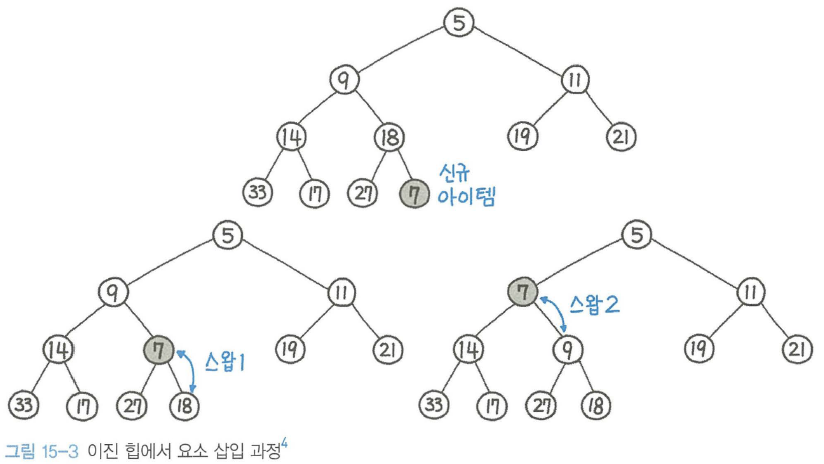

### 추출

- 다시 힙의 특성을 유지하는 작업이 필요하기 때문에 시간복잡도는 $O(\log(n))$

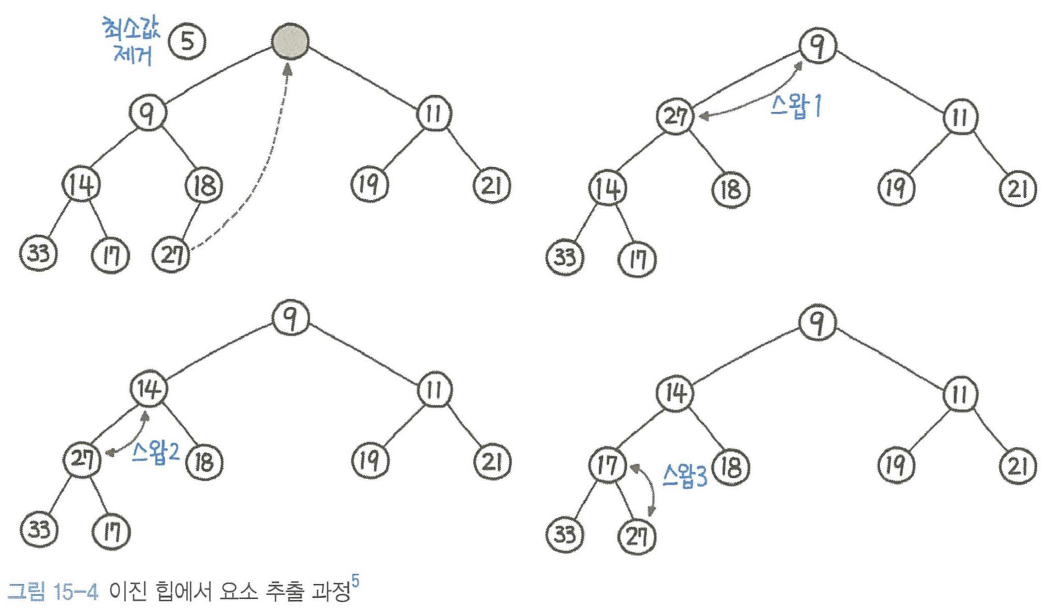

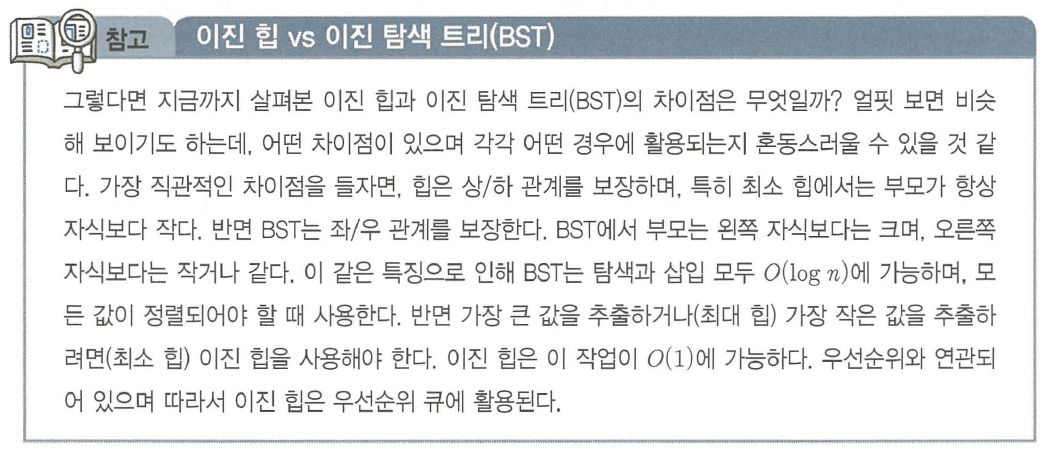

## 55. 배열의 K번째 큰 요소

- 정렬되지 않은 배열에서 k번째 큰 요소를 추출하라.

~~~
- 입력: nums = [3, 2, 3, 1, 2, 4, 5, 5, 6], k = 4

- 출력: 4
~~~

### 풀이 1: heapq 모듈 이용

In [9]:
import heapq
from typing import List

def findKthLargest(num: List[int], k: int) -> int:
  heap = list()

  for n in nums:
    heapq.heappush(heap, -n)
    print(heap)
  print(" ")
  
  for _ in range(1, k):
    heapq.heappop(heap)
    print(heap)
    
  return -heapq.heappop(heap)

nums = [3, 2, 3, 1, 2, 4, 5, 5, 6]
k = 4

# result = 4
print(findKthLargest(nums, k))

[-3]
[-3, -2]
[-3, -2, -3]
[-3, -2, -3, -1]
[-3, -2, -3, -1, -2]
[-4, -2, -3, -1, -2, -3]
[-5, -2, -4, -1, -2, -3, -3]
[-5, -5, -4, -2, -2, -3, -3, -1]
[-6, -5, -4, -5, -2, -3, -3, -1, -2]
 
[-5, -5, -4, -2, -2, -3, -3, -1]
[-5, -2, -4, -2, -1, -3, -3]
[-4, -2, -3, -2, -1, -3]
4


### 풀이 2: heapq 모듈의 heapify 이용

- 모든 값을 push하지 않고도 한 번에 heapify()하여 처리할 수 있음
- heapify()란 주어진 자료구조가 힙 특성을 만족하도록 바꿔주는 연산
- 일반적인 리스트는 힙 특성을 만족하는 리스트로 값의 위치가 변경됨
- 주의) 하나라도 값을 추가하면 힙 특성이 깨짐

In [11]:
import heapq
from typing import List

def findKthLargest(num: List[int], k: int) -> int:
  heapq.heapify(nums)

  print(nums)
  print(" ")
  for _ in range(len(nums) - k):
    heapq.heappop(nums)

  return heapq.heappop(nums)

nums = [3, 2, 3, 1, 2, 4, 5, 5, 6]
k = 4

# result = 4
print(findKthLargest(nums, k))

[1, 2, 3, 2, 3, 4, 5, 5, 6]
 
4


### 풀이 3: heapq 모듈의 nlargest 이용

- n번째 큰 값을 추출하는 기능도 있음

- nsmallest()를 사용하면 n번째 작은 값도 추출이 가능함

In [13]:
import heapq
from typing import List

def findKthLargest(num: List[int], k: int) -> int:
  print(heapq.nlargest(k, nums))
  return heapq.nlargest(k, nums)[-1]

nums = [3, 2, 3, 1, 2, 4, 5, 5, 6]
k = 4

# result = 4
print(findKthLargest(nums, k))

[6, 5, 5, 4]
4


### 풀이 4: 정렬을 이용한 풀이

- 추가, 삭제가 빈번할 때는 heapq를 이용한 힙 정렬이 유용함
- 입력값이 고정되어 있을 때는 정렬도 좋음

In [15]:
from typing import List

def findKthLargest(num: List[int], k: int) -> int:
  return sorted(nums, reverse=True)[k-1]

nums = [3, 2, 3, 1, 2, 4, 5, 5, 6]
k = 4

# result = 4
print(findKthLargest(nums, k))

4
